In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
trade = pd.read_csv("trade.csv")
trade = trade.drop("기타사항", axis=1)
trade.dropna(how="all", subset=["수출건수", "수출금액", "수입건수", "수입금액", "무역수지"], inplace=True)
trade.loc[191, '수출금액'] = (trade.loc[188, '수출금액'] + trade.loc[194, '수출금액'] )/2
trade.loc[191, '무역수지'] = (trade.loc[188, '무역수지'] + trade.loc[194, '무역수지'] )/2
trade.drop_duplicates(inplace=True)

### 임의의 데이터를 생성해서 정규화 해보기

In [3]:
x = pd.DataFrame({'A': np.random.randn(100)*4+4,
                 'B': np.random.randn(100)-1})
x

,A,B
0,2.647060,0.017668
1,4.574012,-0.425769
2,3.869561,-0.929176
3,1.753561,0.026319
4,7.470267,-2.695071
...,...,...
95,1.667151,2.135065
96,1.553666,-1.882531
97,-1.796662,0.428472
98,5.603041,-0.781387


In [4]:
# Standardization 기법
x_standardization = (x-x.mean())/x.std()
x_standardization

,A,B
0,-0.408499,0.937077
1,0.107511,0.506169
2,-0.081131,0.016986
3,-0.647765,0.945483
4,0.883086,-1.699016
...,...,...
95,-0.670904,2.994649
96,-0.701293,-0.909433
97,-1.598462,1.336274
98,0.383070,0.160598


In [5]:
# min-max scaling 기법
x_min_max = (x-x.min())/(x.max()-x.min())
x_min_max

,A,B
0,0.434325,0.658575
1,0.530668,0.587072
2,0.495448,0.505899
3,0.389652,0.659970
4,0.675475,0.221152
...,...,...
95,0.385332,1.000000
96,0.379658,0.352172
97,0.212149,0.724816
98,0.582118,0.529729


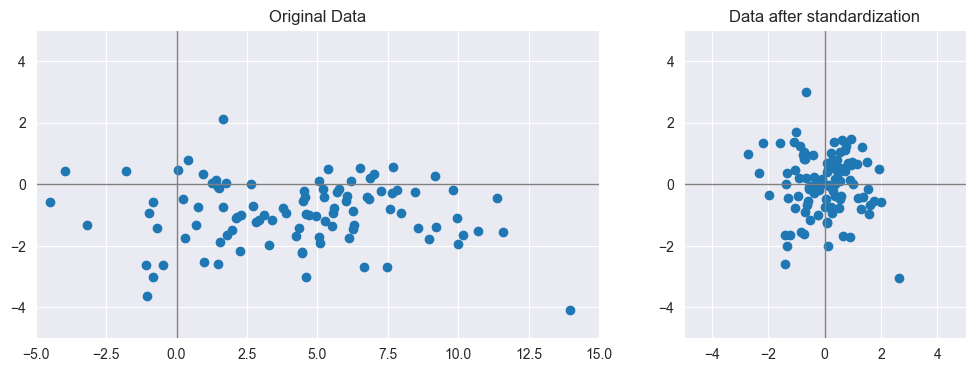

In [6]:
fig, axs = plt.subplots(1,2, figsize=(12, 4),
                        gridspec_kw={'width_ratios': [2, 1]})

axs[0].scatter(x['A'], x['B'])
axs[0].set_xlim(-5, 15)
axs[0].set_ylim(-5, 5)
axs[0].axvline(c='grey', lw=1)
axs[0].axhline(c='grey', lw=1)
axs[0].set_title('Original Data')

axs[1].scatter(x_standardization['A'], x_standardization['B'])
axs[1].set_xlim(-5, 5)
axs[1].set_ylim(-5, 5)
axs[1].axvline(c='grey', lw=1)
axs[1].axhline(c='grey', lw=1)
axs[1].set_title('Data after standardization')

plt.show()

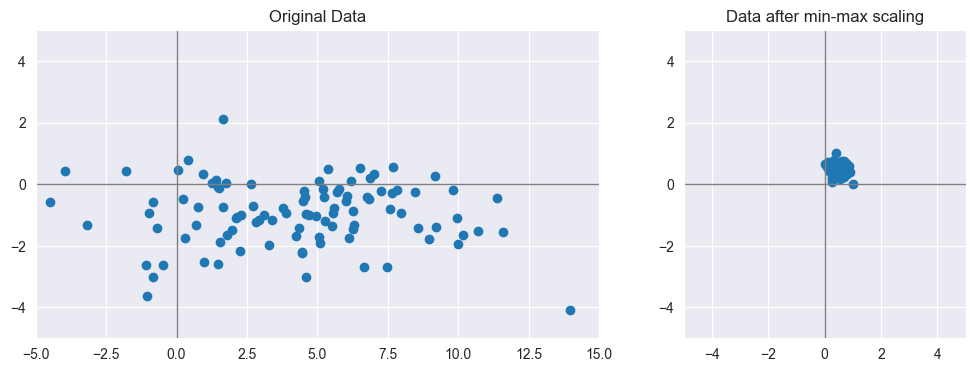

In [7]:
fig, axs = plt.subplots(1,2, figsize=(12, 4),
                        gridspec_kw={'width_ratios': [2, 1]})

axs[0].scatter(x['A'], x['B'])
axs[0].set_xlim(-5, 15)
axs[0].set_ylim(-5, 5)
axs[0].axvline(c='grey', lw=1)
axs[0].axhline(c='grey', lw=1)
axs[0].set_title('Original Data')

axs[1].scatter(x_min_max['A'], x_min_max['B'])
axs[1].set_xlim(-5, 5)
axs[1].set_ylim(-5, 5)
axs[1].axvline(c='grey', lw=1)
axs[1].axhline(c='grey', lw=1)
axs[1].set_title('Data after min-max scaling')

plt.show()

### trade 데이터를 가지고 정규화 해보기

In [8]:
cols = ['수출건수', '수출금액', '수입건수', '수입금액', '무역수지']
trade_standardization = (trade[cols]-trade[cols].mean())/trade[cols].std()
trade_standardization.head()

,수출건수,수출금액,수입건수,수입금액,무역수지
0,-0.007488,1.398931,-0.163593,1.283660,1.255899
1,-0.689278,-0.252848,0.412529,-0.964444,0.400646
2,-0.847838,-1.091156,-0.993148,-0.863844,-1.098217
3,-0.417598,0.852853,-0.576399,0.705292,0.831767
4,-0.764918,-0.389673,0.146306,-1.276341,0.437586


In [9]:
trade_standardization.describe()

,수출건수,수출금액,수입건수,수입금액,무역수지
count,1.950000e+02,1.950000e+02,1.950000e+02,1.950000e+02,1.950000e+02
mean,-1.093143e-16,6.832142e-17,1.821904e-17,-5.465713e-17,4.099285e-17
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,-9.194976e-01,-1.231761e+00,-9.984408e-01,-1.276341e+00,-1.604200e+00
25%,-5.937426e-01,-1.041338e+00,-7.673625e-01,-7.911669e-01,-1.117203e+00
50%,-4.373265e-01,-1.564700e-01,-3.429346e-01,-4.137392e-01,1.422420e-01
75%,4.420459e-01,1.037200e+00,3.927781e-01,8.827841e-01,7.457220e-01
max,5.486317e+00,2.078416e+00,3.239068e+00,2.376092e+00,2.433663e+00


In [10]:
trade[cols] = (trade[cols]-trade[cols].min())/(trade[cols].max()-trade[cols].min())
trade.head()

,기간,국가명,수출건수,수출금액,수입건수,수입금액,무역수지
0,2015년 01월,중국,0.142372,0.794728,0.197014,0.700903,0.708320
1,2015년 01월,미국,0.035939,0.295728,0.332972,0.085394,0.496512
2,2015년 01월,일본,0.011187,0.042477,0.001249,0.112938,0.125310
3,2015년 02월,중국,0.078351,0.629759,0.099597,0.542551,0.603281
4,2015년 02월,미국,0.024131,0.254394,0.270146,0.000000,0.505660


In [11]:
trade.describe()

,수출건수,수출금액,수입건수,수입금액,무역수지
count,195.000000,195.000000,195.000000,195.000000,195.000000
mean,0.143541,0.372113,0.235620,0.349450,0.397289
std,0.156108,0.302099,0.235988,0.273790,0.247656
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.050853,0.057527,0.054532,0.132836,0.120608
50%,0.075271,0.324844,0.154691,0.236172,0.432516
75%,0.212548,0.685450,0.328311,0.591147,0.581972
max,1.000000,1.000000,1.000000,1.000000,1.000000


두가지 기법의 차이로 봤을때 min-max기법이 좀더 잘 작동된다

### 머신러닝에서는 train데이터를 기준으로 test데이터를 정규화시켜야함

In [12]:
train = pd.DataFrame([[10, -10], [30, 10], [50, 0]])
test = pd.DataFrame([[0, 1], [10, 10]])

In [13]:
train

,0,1
0,10,-10
1,30,10
2,50,0


In [14]:
test

,0,1
0,0,1
1,10,10


In [15]:
train_min_max = (train-train.min())/(train.max()-train.min())
test_min_max =  (test-test.min())/(train.max()-train.min())

In [16]:
train_min_max

,0,1
0,0.0,0.0
1,0.5,1.0
2,1.0,0.5


In [20]:
test_min_max

,0,1
0,0.00,0.00
1,0.25,0.45


In [22]:
from sklearn.preprocessing import MinMaxScaler
train = [[10, -10], [30, 10], [50, 0]]
test = [[0, 1]]
scaler = MinMaxScaler()

In [24]:
scaler.fit_transform(train)

array([[0. , 0. ],
       [0.5, 1. ],
       [1. , 0.5]])

In [25]:
scaler.transform(test)

array([[-0.25,  0.55]])

In [ ]:
.